[View in Colaboratory](https://colab.research.google.com/github/gtambi143/Logistic-Regression/blob/master/IrisDataAnalysis.ipynb)

In [0]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import matplotlib.pyplot as plt

In [3]:
iris = datasets.load_iris()

#data exploration
iris.feature_names
iris.target_names
iris.data
iris.target


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Text(0,0.5,'Petal Length')

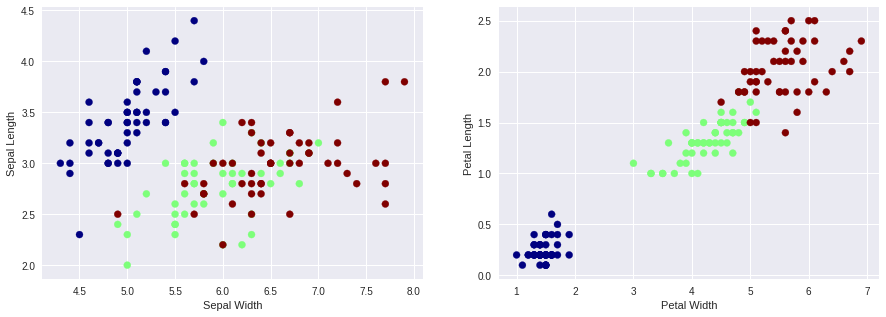

In [4]:
#relation between sepal length and sepal width
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(iris.data[:,0],iris.data[:,1], c=iris.target, cmap = 'jet')
plt.xlabel('Sepal Width')
plt.ylabel('Sepal Length')

#relation between petal length and petal width
plt.subplot(1,2,2)
plt.scatter(iris.data[:,2],iris.data[:,3], c=iris.target, cmap = 'jet')
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')

In [37]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics

x = iris.data
y = iris.target

train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.3,random_state=0)


acc_score = []

#checking the accuracy with different C values

for c in [0.001,0.01,0.1,1,10,100,1000,10000,100000]:
  
  logistic_model = LogisticRegression(C=c,penalty = 'l2')
  logistic_model.fit(train_x,train_y)

  predict_test = logistic_model.predict(test_x)

  acc_score.append(metrics.accuracy_score(test_y, predict_test))

acc_score

#we saw that by increasing the value of C the accuracy of the model increases. increasing the value of C will decrease the value of the regularization parameter
#and due to which the complexity of the model increases and it tries to overfit. Very low values of the C will increase the regularization parameter resulting 
#in a simpler model and it will underfit. 

[0.24444444444444444,
 0.6,
 0.6444444444444445,
 0.8888888888888888,
 0.9333333333333333,
 0.9555555555555556,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777]

In [43]:
metrics.confusion_matrix(test_y,predict_test)

metrics.f1_score(test_y,predict_test,average='macro')


ValueError: ignored

array([0])

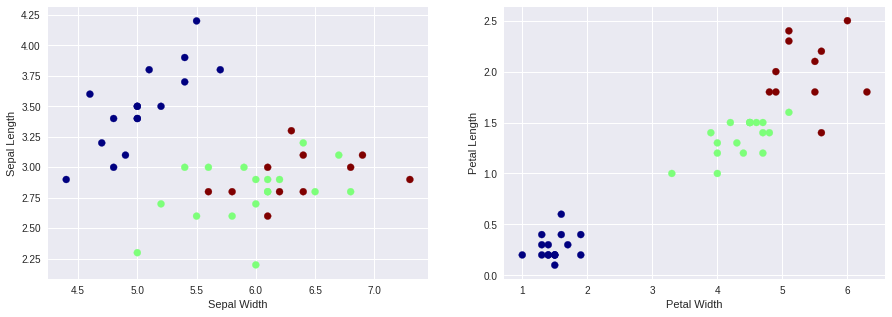

In [52]:
#relation between sepal length and sepal width
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(test_x[:,0],test_x[:,1], c=test_y, cmap = 'jet')
plt.xlabel('Sepal Width')
plt.ylabel('Sepal Length')

#relation between petal length and petal width
plt.subplot(1,2,2)
plt.scatter(test_x[:,2],test_x[:,3], c=test_y, cmap = 'jet')
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')
